In [1]:
!pip install opendatasets --quiet

In [2]:
import opendatasets as od

url = "https://www.kaggle.com/competitions/kitchenware-classification/data"
od.download(url)

100%|██████████| 1.63G/1.63G [00:11<00:00, 147MB/s]



Extracting archive ./kitchenware-classification/kitchenware-classification.zip to ./kitchenware-classification


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

train_df = pd.read_csv("./kitchenware-classification/train.csv", dtype=str)
test_df = pd.read_csv("./kitchenware-classification/test.csv", dtype=str)
submit_df = pd.read_csv("./kitchenware-classification/sample_submission.csv")

In [8]:
train_df.head()

,Id,label
0,0560,glass
1,4675,cup
2,0875,glass
3,4436,spoon
4,8265,plate


In [9]:
test_df.head()

,Id
0,0678
1,3962
2,9271
3,5133
4,8842


In [6]:
submit_df.head()

,Id,label
0,678,spoon
1,3962,glass
2,9271,spoon
3,5133,plate
4,8842,spoon


In [39]:
def append_ext(fp):
  return fp + ".jpg"

In [40]:
train_df["Id"] = train_df["Id"].apply(append_ext)
test_df["Id"] = test_df["Id"].apply(append_ext)

In [13]:
train_df.head()

,Id,label
0,0560.jpg,glass
1,4675.jpg,cup
2,0875.jpg,glass
3,4436.jpg,spoon
4,8265.jpg,plate


In [41]:
import os 
import matplotlib.image as mpimg


target_folder = "./kitchenware-classification/images/"
current_img = os.listdir(target_folder)

x_train = []
x_test = []

for image in current_img:
  # print(image)
  if image in train_df['Id'].tolist():
    x_train.append(image)
  else:
    x_test.append(image)


train_size  = []
train_ratio = []
train_lx    = []
train_ly    = []

test_size   = []
test_ratio  = []
test_lx     = []
test_ly     = []

for image in x_train:
  img = mpimg.imread(target_folder + "/" + image)
  (lx,ly,lz) = img.shape
  train_size.append(lx*ly/1024)
  train_ratio.append(lx/ly)
  train_lx.append(lx)
  train_ly.append(ly)

for image in x_test:
  img = mpimg.imread(target_folder + "/" + image)
  (lx,ly,lz) = img.shape
  test_size.append(lx*ly/1024)
  test_ratio.append(lx/ly)
  test_lx.append(lx)
  test_ly.append(ly)

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


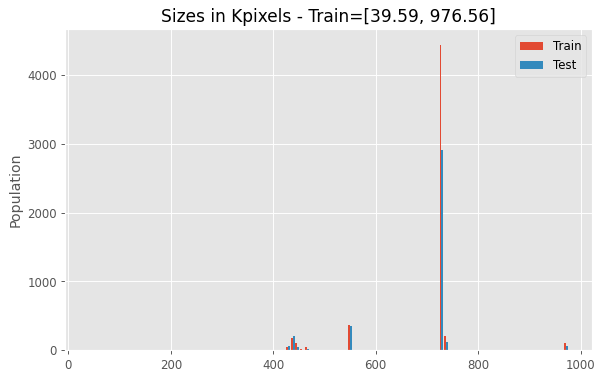

In [44]:
#  ------ Statistics / sizes
plt.figure(figsize=(8, 5), dpi=85)
plt.hist([train_size,test_size], bins=100)
plt.gca().set(
    title='Sizes in Kpixels - Train=[{:5.2f}, {:5.2f}]'.format(min(train_size),max(train_size)), 
              ylabel='Population', 
              # xlim=[0,30]
)
plt.legend(['Train','Test'])
plt.show()

Image sizes majority 750 kilopixel.
different sizes --> bad because tensors should have same size

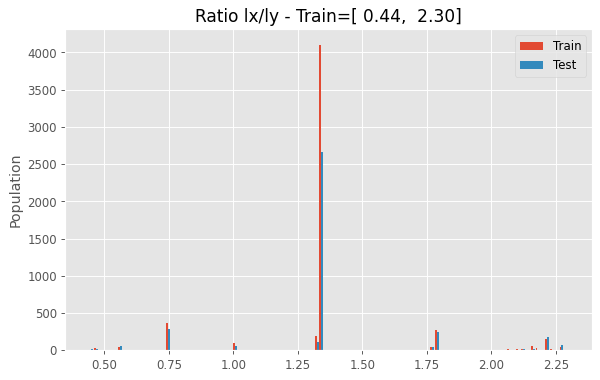

In [45]:
# ------ Statistics / ratio lx/ly
plt.figure(figsize=(8, 5), dpi=85)
plt.hist([train_ratio,test_ratio], bins=100)
plt.gca().set(title='Ratio lx/ly - Train=[{:5.2f}, {:5.2f}]'.format(min(train_ratio),max(train_ratio)), 
              ylabel='Population'
)
plt.legend(['Train','Test'])
plt.show()

we have majority vertical images 

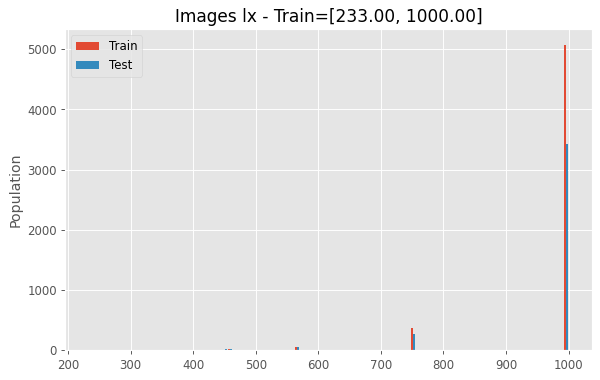

In [46]:
# ------ Statistics / lx
plt.figure(figsize=(8, 5), dpi=85)
plt.hist([train_lx,test_lx], bins=100)
plt.gca().set(title='Images lx - Train=[{:5.2f}, {:5.2f}]'.format(min(train_lx),max(train_lx)), 
              ylabel='Population'
)
plt.legend(['Train','Test'])
plt.show()

lx the width 

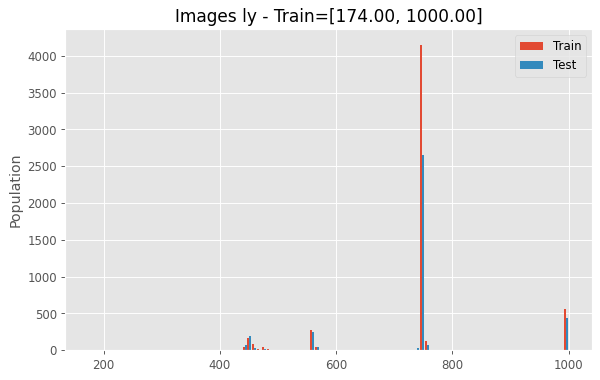

In [47]:
# ------ Statistics / ly
plt.figure(figsize=(8, 5), dpi=85)
plt.hist([train_ly,test_ly], bins=100)
plt.gca().set(title='Images ly - Train=[{:5.2f}, {:5.2f}]'.format(min(train_ly),max(train_ly)), 
              ylabel='Population'
)
plt.legend(['Train','Test'])
plt.show()

ly the length

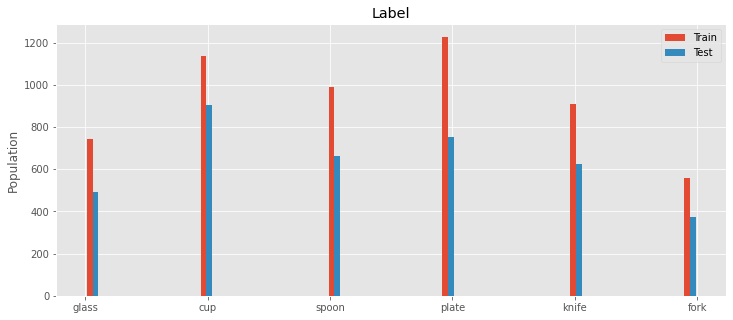

In [48]:
# ------ Statistics / Label
plt.figure(figsize=(12,5))
plt.hist([train_df['label'],submit_df['label']], bins=43)
plt.gca().set(title='Label', ylabel='Population')
plt.legend(['Train','Test'])
plt.show()

not all classes are represented equally